In [11]:
pip install ucimlrepo
pip install matplotlib
pip install scikit-learn
pip install plotly

SyntaxError: invalid syntax (3993713740.py, line 1)

This code is used to decide which of the following regression models: Support Vector Regression (SVR), Polynomial Regression, and Random Forest Regression is the best for the given dataset

In [1]:
from ucimlrepo import fetch_ucirepo #source of the dataset is uci machine learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_log_error
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

The code below are the regression models, with the R squared also calculated and printed to show best fit.

In [4]:
def svr(name:str, dataset, X, y):
    # X = dataset.iloc[:, :-1].values
    # y = dataset.iloc[:, -1].values
    y = np.array(y).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    y_train = sc_y.fit_transform(y_train)
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))

def multiplelinearregression(name:str, dataset, X, y):
    # X = dataset.iloc[:, :-1].values
    # y = dataset.iloc[:, -1].values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))

def polynomialregression(name:str, dataset, X, y):
    # X = dataset.iloc[:, :-1].values
    # y = dataset.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)
    y_pred = regressor.predict(poly_reg.transform(X_test))
    np.set_printoptions(precision=2)
    y_pred = np.array(y_pred).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))

def decisiontreeregression(name:str, dataset, X, y):
    #dataset = pd.read_csv('ENTER_THE_NAME_OF_YOUR_DATASET_HERE.csv')
    # X = dataset.iloc[:, :-1].values #get all values rows and all columns except the last one
    # y = dataset.iloc[:, -1].values #get all rows of the last column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))

def randomforestregression(name:str, dataset, X, y):
    # X = dataset.iloc[:, :-1].values
    # y = dataset.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))

In [7]:
mod = int(input("Choose"))
if mod == 1:
    dataset = pd.read_csv('Regression/Data.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    print(" columns: {}".format(dataset.columns))
    #print("Target columns: "+y.columns)
else:
    dataset = fetch_ucirepo(id=294) 
    X = dataset.data.features 
    y = dataset.data.targets
    #print(dataset.data.columns)
    print("Feature columns: {}".format(dataset.data.features.columns))
    print("Target columns: "+dataset.data.targets.columns)
randomforestregression("Random Forest Regression", dataset, X, y)
decisiontreeregression("Decision Tree Regression", dataset, X, y)
multiplelinearregression("Multiple Linear Regression", dataset, X, y)
svr("Support Vector Regression", dataset, X, y)
polynomialregression("Polynomial Regression",dataset, X, y)

Choose 2


Feature columns: Index(['AT', 'V', 'AP', 'RH'], dtype='object')
Index(['Target columns: PE'], dtype='object')


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using Random Forest Regression, R2 value is: 0.9615908334363876
Using Decision Tree Regression, R2 value is: 0.922905874177941
Using Multiple Linear Regression, R2 value is: 0.9325315554761303


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using Support Vector Regression, R2 value is: 0.9480784049986265
Using Polynomial Regression, R2 value is: 0.9421687659462405


However, the regression models above do not work for data with categorical values, only for numeric values. Everything after this will be trying to make it work for categorical values

In [8]:
categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(categorical_cols)
print(numeric_cols)

[]
['AT', 'V', 'AP', 'RH']


In [9]:
print("Feature columns: {}".format(dataset.data.features.columns))
print("Target columns: "+dataset.data.targets.columns)

Feature columns: Index(['AT', 'V', 'AP', 'RH'], dtype='object')
Index(['Target columns: PE'], dtype='object')


Below are the updated versions (denoted by _v2 indicating second version), which also graphs the actual vs predicted values

In [10]:
def polynomialregression_v2(name: str, dataset, X, y):
    degree = 2
    model_type="linear"
    """
    Perform polynomial regression with automatic one-hot encoding for categorical columns.
    
    Args:
        name (str): Model name for reporting.
        dataset: Full dataset (used to infer dtypes if X is a slice).
        X: Feature matrix (DataFrame or array).
        y: Target variable.
        degree (int): Degree of polynomial features (default=2).
        model_type (str): 'linear' or 'ridge' (default='linear').
    """
    # Convert X to DataFrame if it's a slice/numpy array
    # if not isinstance(X, pd.DataFrame):
    #     X = pd.DataFrame(X, columns=dataset.columns[:-1] if hasattr(dataset, 'columns') else None)
    
    # Identify categorical columns (non-float, non-int)
    categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Preprocessor: Scale numeric + one-hot encode categorical
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing numeric values
                ('scaler', StandardScaler())                  # Scale numeric features
            ]), numeric_cols),  # No scaling (already handled externally if needed)
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
                ('encoder', OneHotEncoder(drop='first', sparse_output=False))
            ]), categorical_cols)
        ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Preprocess data (one-hot encode categoricals)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    #print(f"columns: {X_train_processed}")
    feature_names = preprocessor.get_feature_names_out()
    print("Processed feature names:\n", feature_names)
    # Apply polynomial features ONLY to numeric columns
    if numeric_cols:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        # Get indices of numeric columns in processed data
        num_indices = [i for i, col in enumerate(preprocessor.get_feature_names_out()) 
                       if col.startswith('num__')]
        # Transform numeric features
        X_train_poly = poly.fit_transform(X_train_processed[:, num_indices])
        X_test_poly = poly.transform(X_test_processed[:, num_indices])
        # Combine with categorical features
        X_train_final = np.hstack([X_train_poly, X_train_processed[:, len(num_indices):]])
        X_test_final = np.hstack([X_test_poly, X_test_processed[:, len(num_indices):]])
    else:
        # No numeric features (unlikely for regression)
        X_train_final = X_train_processed
        X_test_final = X_test_processed
    
    # Initialize model
    if model_type.lower() == 'ridge':
        regressor = Ridge(alpha=1.0)
    else:
        regressor = LinearRegression()
    
    # Train and predict
    regressor.fit(X_train_final, y_train)
    y_pred = regressor.predict(X_test_final)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    print(f"Using {name} (degree={degree}, model={model_type}), R² value is: {r2:.4f}")
    plt.scatter(y_test,y_pred,color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
    plt.title("Polynomial Regression V2")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()


    # df = pd.DataFrame({'Actual': y_test.to_numpy().ravel(),
    #                'Predicted': y_pred.ravel()})

    # fig = px.scatter(df, x='Actual', y='Predicted',
    #             title="Polynomial Regression V2",
    #             color_discrete_sequence=['red'])
    # #print(f"MSLE: {y_test, y_pred}")
    # fig.add_scatter(x=[y_pred.min(), y_pred.max()],
    #            y=[y_pred.min(), y_pred.max()],
    #            mode='lines',
    #            line=dict(color='blue', dash='dash'),
    #            name='Ideal Fit')
    
    # fig.update_layout(
    # legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    # showlegend=True
    # )
    # fig.update_traces(marker=dict(opacity=0.5))  # Make scatter points semi-transparent
    # #fig.update_layout(shapes=[dict(layer='below')])  # Force line behind points

    # fig.add_annotation(
    # xref="paper", yref="paper",
    # x=0.95, y=0.05,
    # text=f"R² = {r2:.3f}",
    # showarrow=False,
    # font=dict(size=14, color="black"),
    # bgcolor="white",
    # bordercolor="black",
    # borderwidth=1
    # )
    # fig.show()

    #return regressor, preprocessor, r2

def svr_v2(name:str, dataset, X, y):
    # Convert X to DataFrame if it's a slice/numpy array
    # if not isinstance(X, pd.DataFrame):
        # X = pd.DataFrame(X, columns=dataset.columns[:-1] if hasattr(dataset, 'columns') else None)
    
    # Ensure y is 1D (n_samples,) 
    #y = np.array(y).ravel()  # Fix: Use ravel() instead of reshape(-1, 1)
    
    # Debug: Check shapes
    print(f"X shape: {X.shape}, y shape: {y.shape}")  # Should match in first dimension
    
    # Proceed with preprocessing and train_test_split
    categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # preprocessor = ColumnTransformer(
    #     transformers=[
    #         ('num', StandardScaler(), numeric_cols),  # Scale numeric features
    #         ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    #     ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing numeric values
                ('scaler', StandardScaler())                  # Scale numeric features
            ]), numeric_cols),  # No scaling (already handled externally if needed)
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
                ('encoder', OneHotEncoder(drop='first', sparse_output=False))
            ]), categorical_cols)
        ])
    
    # Split data (now X and y have consistent shapes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Preprocess
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Train SVR
    regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    regressor.fit(X_train_processed, y_train)
    
    # Predict and evaluate
    y_pred = regressor.predict(X_test_processed)
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))
    r2= r2_score(y_test, y_pred)
    plt.scatter(y_test,y_pred,color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color="blue")
    plt.title("SVR V2")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()
    #print(f"MSLE: {y_test, y_pred}")
    # df = pd.DataFrame({'Actual': y_test.to_numpy().ravel(),
    #                'Predicted': y_pred.ravel()})

    # fig = px.scatter(df, x='Actual', y='Predicted',
    #             title="SVR V2",
    #             color_discrete_sequence=['red'])
    # #print(f"MSLE: {y_test, y_pred}")
    # # fig.add_scatter(x=[y_test.min(), y_test.max()],
    # #            y=[y_test.min(), y_test.max()],
    # #            mode='lines',
    # #            line=dict(color='blue'),
    # #            name='Ideal Fit')
    # fig.add_shape(
    # type='line',
    # x0=y_test.min(), y0=y_test.min(),
    # x1=y_test.max(), y1=y_test.max(),
    # line=dict(color='blue', width=2),
    # xref='x', yref='y')
    
    # fig.update_layout(
    # legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    # showlegend=True
    # )
    # fig.update_traces(marker=dict(opacity=0.5))  # Make scatter points semi-transparent
    # #fig.update_layout(shapes=[dict(layer='below')])  # Force line behind points

    # fig.add_annotation(
    # xref="paper", yref="paper",
    # x=0.95, y=0.05,
    # text=f"R² = {r2:.3f}",
    # showarrow=False,
    # font=dict(size=14, color="black"),
    # bgcolor="white",
    # bordercolor="black",
    # borderwidth=1
    # )
    # fig.show()

def randomforestregression_v2(name:str, dataset, X, y):
    # X = dataset.iloc[:, :-1].values
    # y = dataset.iloc[:, -1].values
    print(f"X shape: {X.shape}, y shape: {y.shape}")  # Should match in first dimension
    
    # Proceed with preprocessing and train_test_split
    categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),  # Scale numeric features
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    regressor = RandomForestRegressor(n_estimators = 1000, random_state = 1128)
    regressor.fit(X_train_processed, y_train)
    y_pred = regressor.predict(X_test_processed)
    
    np.set_printoptions(precision=2)
    #print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    print("Using {}, R2 value is: {}".format(name, r2_score(y_test, y_pred)))
    #print(f"MSLE: {y_test, y_pred}")
    plt.scatter(y_test,y_pred,color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
    plt.title("Random Forest Regression V2")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()
    # r2= r2_score(y_test, y_pred)
    # df = pd.DataFrame({'Actual': y_test.to_numpy().ravel(),
    #                'Predicted': y_pred.ravel()})

    # fig = px.scatter(df, x='Actual', y='Predicted',
    #             title="Random Forest Regression V2",
    #             color_discrete_sequence=['red'])
    # #print(f"MSLE: {y_test, y_pred}")
    # fig.add_shape(
    # type="line",
    # xref="x", yref="y",
    # x0=min(y_test.min(), y_pred.min()),
    # y0=min(y_test.min(), y_pred.min()),
    # x1=max(y_test.max(), y_pred.max()),
    # y1=max(y_test.max(), y_pred.max()),
    # line=dict(color="blue", width=3, dash="dash"),
    # layer="below")  # Ensures line stays behind points)
    
    # fig.update_layout(
    # legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    # showlegend=True
    # )
    # fig.update_traces(marker=dict(opacity=0.5))  # Make scatter points semi-transparent
    # #fig.update_layout(shapes=[dict(layer='below')])  # Force line behind points

    # fig.add_annotation(
    # xref="paper", yref="paper",
    # x=0.95, y=0.05,
    # text=f"R² = {r2:.3f}",
    # showarrow=False,
    # font=dict(size=14, color="black"),
    # bgcolor="white",
    # bordercolor="black",
    # borderwidth=1
    # )
    # fig.show()

Processed feature names:
 ['num__AT' 'num__V' 'num__AP' 'num__RH']
Using Polynomial Regression V2 (degree=2, model=linear), R² value is: 0.9422


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


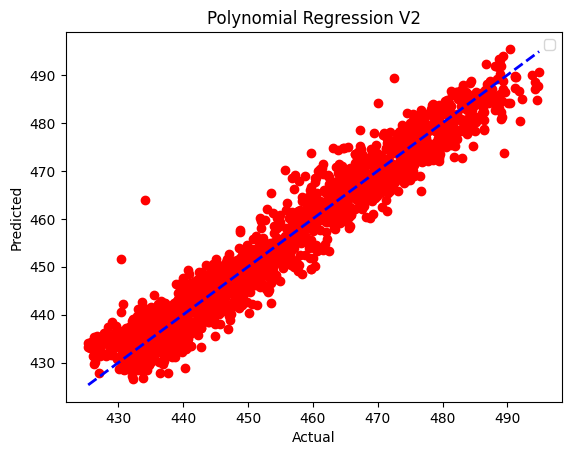

C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X shape: (9568, 4), y shape: (9568, 1)
Using SVR V2, R2 value is: 0.946132448017913


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:170: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


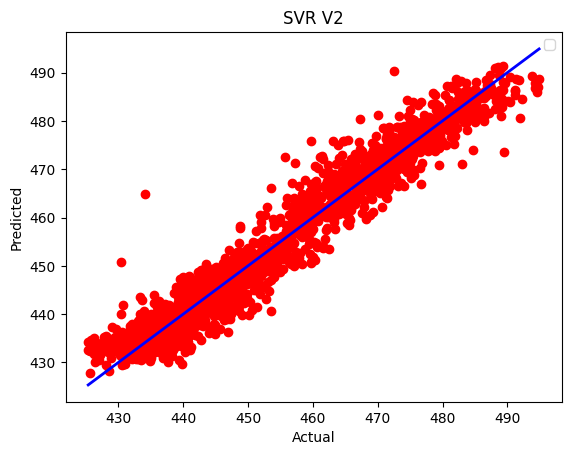

X shape: (9568, 4), y shape: (9568, 1)


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RFR V2, R2 value is: 0.9653170450006543


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:240: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:244: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


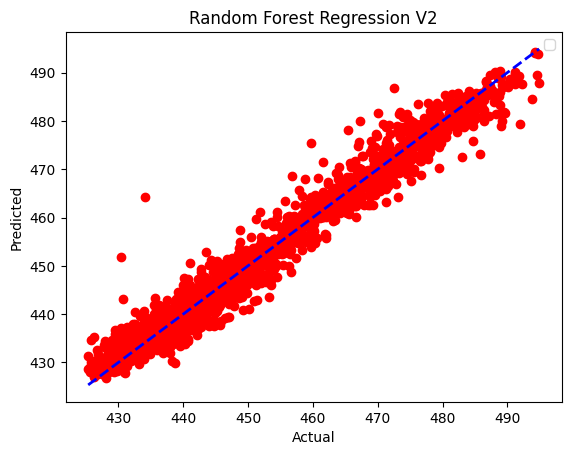

In [11]:

dataset = fetch_ucirepo(id=294) #165 WORKS, compressive concrete strength; 294, combvined cycle  power plant; 368, facebook metrics
X = dataset.data.features 
y = dataset.data.targets
polynomialregression_v2("Polynomial Regression V2",dataset, X, y)
svr_v2("SVR V2",dataset, X, y)
randomforestregression_v2("RFR V2",dataset, X, y)


Processed feature names:
 ['num__Cement' 'num__Blast Furnace Slag' 'num__Fly Ash' 'num__Water'
 'num__Superplasticizer' 'num__Coarse Aggregate' 'num__Fine Aggregate'
 'num__Age']
Using Polynomial Regression V2 (degree=2, model=linear), R² value is: 0.7635


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


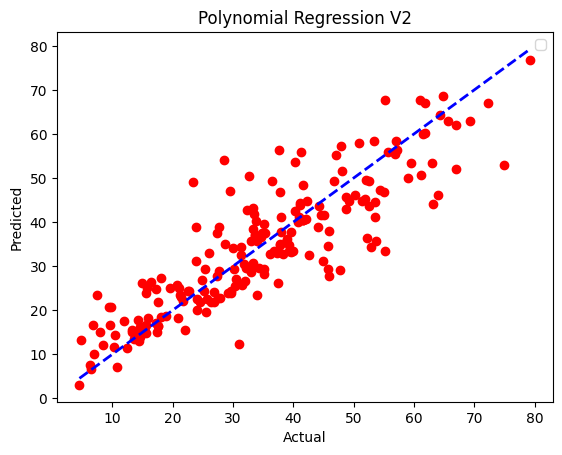

X shape: (1030, 8), y shape: (1030, 1)
Using SVR V2, R2 value is: 0.8699506771950909


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:170: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


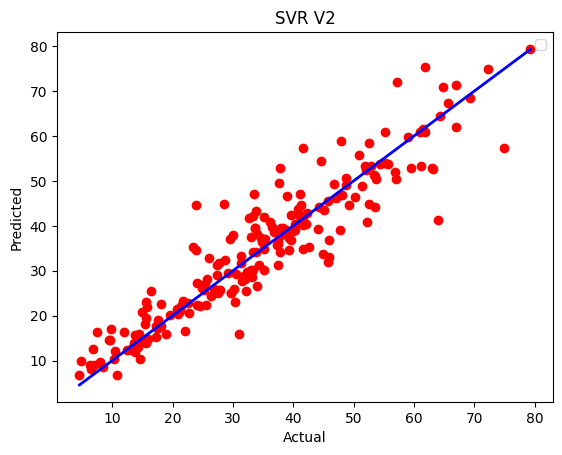

X shape: (1030, 8), y shape: (1030, 1)


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Using RFR V2, R2 value is: 0.9208166739711824


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:240: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:244: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


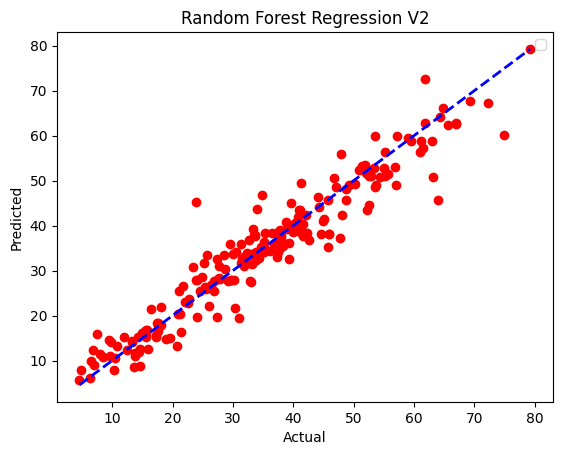

In [12]:
dataset = fetch_ucirepo(id=165) #165 WORKS, compressive concrete strength; 294, combvined cycle  power plant; 368, facebook metrics
X = dataset.data.features 
y = dataset.data.targets
polynomialregression_v2("Polynomial Regression V2",dataset, X, y)
svr_v2("SVR V2",dataset, X, y)
randomforestregression_v2("RFR V2",dataset, X, y)

Processed feature names:
 ['num__Page total likes' 'num__Category' 'num__Post Month'
 'num__Post Weekday' 'num__Post Hour' 'num__Paid'
 'num__Lifetime Post Total Reach' 'num__Lifetime Post Total Impressions'
 'num__Lifetime Engaged Users' 'num__Lifetime Post Consumers'
 'num__Lifetime Post Consumptions'
 'num__Lifetime Post Impressions by people who have liked your Page'
 'num__Lifetime Post reach by people who like your Page'
 'num__Lifetime People who have liked your Page and engaged with your post'
 'num__comment' 'num__like' 'num__share' 'cat__Type_Photo'
 'cat__Type_Status' 'cat__Type_Video']
Using Polynomial Regression V2 (degree=2, model=linear), R² value is: 0.9999


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


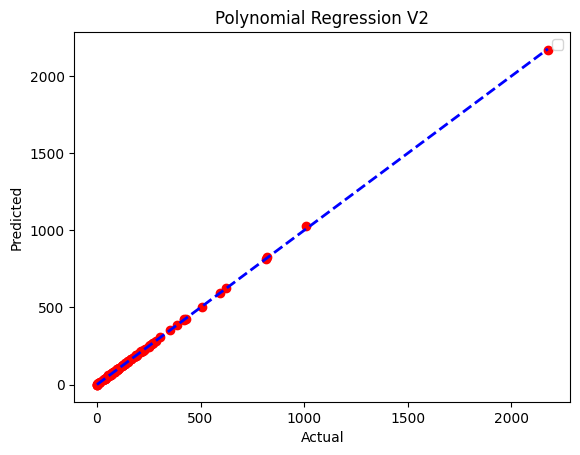

X shape: (500, 18), y shape: (500, 1)
Using SVR V2, R2 value is: 0.41552888372798114


C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:170: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


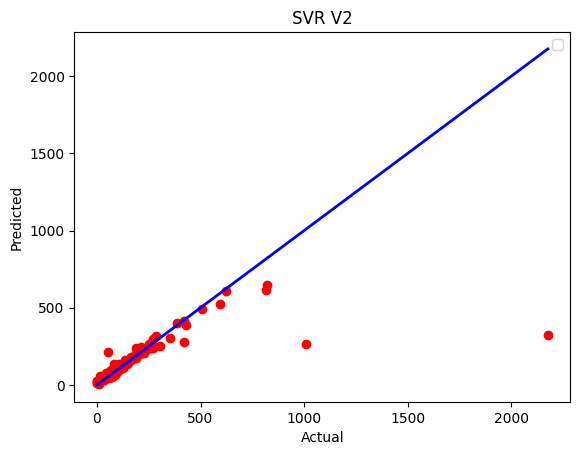

C:\Users\Norbert\Experimental_Codes\Experimental_Codes\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


X shape: (500, 18), y shape: (500, 1)
Using RFR V2, R2 value is: 0.9723129215781958


C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:240: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="blue")
C:\Users\Norbert\AppData\Local\Temp\ipykernel_18384\3601166858.py:244: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


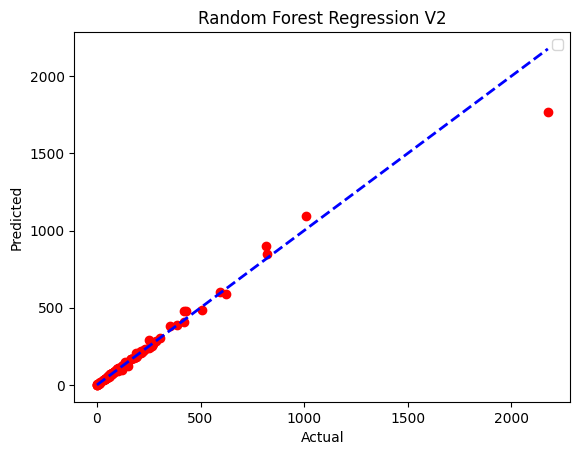

In [13]:
dataset = fetch_ucirepo(id=368) #165 WORKS, compressive concrete strength; 294, combvined cycle  power plant; 368, facebook metrics
X = dataset.data.features 
y = dataset.data.targets
polynomialregression_v2("Polynomial Regression V2",dataset, X, y)
svr_v2("SVR V2",dataset, X, y)
randomforestregression_v2("RFR V2",dataset, X, y)

Best Regression Model can depend on the need, but for the datasets I have used, Random Forest Regression proved to be the most consistent

In [14]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Total Interactions  500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB
None


In [15]:
import plotly.io as pio
pio.renderers.default = 'iframe'